<a href="https://colab.research.google.com/github/cml096/GoogleColabRepo/blob/master/cristobal/Data-02/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [383]:
import pandas as pd
df = pd.read_excel('OperTot - PowerView_ARCH1.xlsx')

In [384]:
list_drop = ['ID','crew#','unit#','tmcat08','tmcat09','tmcat10','tmcat11','tmcat12','tmcat13','tmcat14','tmcat15','tmcat16','tmcat17','tmcat18','tmcat19']
df.drop(list_drop,axis=1,inplace=True)

In [385]:
df["shift#"] = df["shift#"].astype(str)
df.totaltons = df.totaltons.astype(int)

In [386]:
df_palas = df[df.unit == 'Pala']

In [387]:
df_palas.columns

Index(['shiftdate', 'shiftindex', 'shift#', 'start', 'crew', 'eqmtid',
       'logintime', 'locid', 'operid', 'totaltime', 'pit', 'unit',
       'totalloads', 'totaltons', 'loadtime', 'idletime', 'spottime',
       'loadcnt', 'tmcat00', 'tmcat01', 'tmcat02', 'tmcat03', 'tmcat04',
       'tmcat05', 'tmcat06', 'tmcat07'],
      dtype='object')

In [388]:
df_palas.head()

,shiftdate,shiftindex,shift#,start,crew,eqmtid,logintime,locid,operid,totaltime,pit,unit,totalloads,totaltons,loadtime,idletime,spottime,loadcnt,tmcat00,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07
44,2019-07-01,36157,2,28800,G2,307,0,TX210039,mmsunk,3088,MINA,Pala,3,690,0,0,0,3,3088,0,0,3088,0,0,0,0
45,2019-07-01,36157,2,28800,G2,307,3088,TX210039,07641,39893,MINA,Pala,100,23335,22347,5090,7656,100,39893,35320,0,2801,0,0,1772,0
46,2019-07-01,36157,2,28800,G2,307,42981,TX210039,mmsunk,219,MINA,Pala,0,0,0,0,0,0,219,0,0,219,0,0,0,0
47,2019-07-01,36157,2,28800,G2,BUZON,0,,mmsunk,43200,MINA,Pala,0,0,0,0,0,0,43200,0,0,0,43200,0,0,0
48,2019-07-01,36157,2,28800,G2,COSE2,0,,mmsunk,43200,,Pala,0,0,0,0,0,0,43200,0,0,0,43200,0,0,0


In [389]:
palas = pd.DataFrame(df_palas.groupby(['shiftdate','shiftindex','shift#','eqmtid']).sum().reset_index().sort_values('shiftdate'))

In [390]:
palas.columns

Index(['shiftdate', 'shiftindex', 'shift#', 'eqmtid', 'start', 'logintime',
       'totaltime', 'totalloads', 'totaltons', 'loadtime', 'idletime',
       'spottime', 'loadcnt', 'tmcat00', 'tmcat01', 'tmcat02', 'tmcat03',
       'tmcat04', 'tmcat05', 'tmcat06', 'tmcat07'],
      dtype='object')

In [391]:
list_drop = ['start','logintime','totalloads','loadtime','idletime','spottime','tmcat00']
palas.drop(list_drop,axis=1,inplace=True)

In [392]:
palas.head(10)

,shiftdate,shiftindex,shift#,eqmtid,totaltime,totaltons,loadcnt,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07
0,2019-07-01,36156,1,025,43200,0,0,0,0,0,0,3600,39600,0
20,2019-07-01,36157,2,029,43200,0,0,34200,0,1800,0,0,7200,0
21,2019-07-01,36157,2,030,43200,0,0,27000,0,9000,0,0,7200,0
22,2019-07-01,36157,2,210,43200,0,0,0,0,0,0,43200,0,0
23,2019-07-01,36157,2,211,43200,35782,157,35168,0,814,3086,0,4132,0
24,2019-07-01,36157,2,212,43200,0,0,0,0,0,0,43200,0,0
25,2019-07-01,36157,2,213,43200,2833,12,5593,0,367,3466,33774,0,0
27,2019-07-01,36157,2,305,43200,12764,55,30875,0,3972,4192,0,4161,0
28,2019-07-01,36157,2,306,43200,12139,54,24996,0,10339,0,6049,1816,0
29,2019-07-01,36157,2,307,43200,24025,103,35320,0,6108,0,0,1772,0


Calculo Rendimiento

In [393]:
def rendimiento_efectivo(ton,time):
  if time == 0:
    return 0
  else:
    return int((ton/time) * 3600)

In [394]:
palas['rendimiento_efectivo'] = palas.apply(lambda row : rendimiento_efectivo(row.totaltons,row.tmcat01),axis=1)

Dato anomalo


In [395]:
palas[palas.rendimiento_efectivo > 2 * 3600]

,shiftdate,shiftindex,shift#,eqmtid,totaltime,totaltons,loadcnt,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,rendimiento_efectivo
7406,2020-01-26,36574,1,307,43200,15268,64,2660,0,21656,18884,0,0,0,20663
10470,2020-05-09,36783,2,211,43200,240,1,20,0,66,0,42478,636,0,43200


In [396]:
palas.drop([7406,10470],axis=0,inplace=True)

(?)

In [397]:
palas[palas.rendimiento_efectivo > 1.5 * 3600]

,shiftdate,shiftindex,shift#,eqmtid,totaltime,totaltons,loadcnt,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,rendimiento_efectivo
7543,2020-01-30,36582,1,BUZON,43200,3698,16,2092,0,0,41108,0,0,0,6363


Eliminamos las Palas con toneladas y timepo efectivos iguales a 0

In [398]:
palas = palas[(palas.totaltons != 0) & (palas.tmcat01 != 0)]

In [399]:
palas.drop(['totaltons','tmcat01'],axis=1,inplace=True)

La fecha la convertimos en un valor númerico

In [400]:
import datetime as dt

In [401]:
palas['shiftdate'] = pd.to_datetime(palas['shiftdate'])
palas['shiftdate'] = palas['shiftdate'].map(dt.datetime.toordinal)

(?) Que fechas nos quedamos

In [402]:
palas.drop('shiftindex',axis=1,inplace=True)
#palas.drop('shiftdate',axis=1,inplace=True)

In [403]:
palas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3813 entries, 23 to 13629
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   shiftdate             3813 non-null   int64 
 1   shift#                3813 non-null   object
 2   eqmtid                3813 non-null   object
 3   totaltime             3813 non-null   int64 
 4   loadcnt               3813 non-null   int64 
 5   tmcat02               3813 non-null   int64 
 6   tmcat03               3813 non-null   int64 
 7   tmcat04               3813 non-null   int64 
 8   tmcat05               3813 non-null   int64 
 9   tmcat06               3813 non-null   int64 
 10  tmcat07               3813 non-null   int64 
 11  rendimiento_efectivo  3813 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 387.3+ KB


In [404]:
palas.describe()

,shiftdate,totaltime,loadcnt,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,rendimiento_efectivo
count,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000
mean,737448.414110,43188.603462,70.800682,2.518227,2676.798846,5107.036716,5404.872017,2742.080252,1063.902439,2203.554944
std,132.275731,314.552668,43.253591,141.701029,2472.710902,9136.297903,9343.814180,3029.902928,4922.236927,925.870004
min,737241.000000,34509.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000
25%,737330.000000,43200.000000,35.000000,0.000000,977.000000,0.000000,0.000000,0.000000,0.000000,1597.000000
50%,737442.000000,43200.000000,69.000000,0.000000,2159.000000,0.000000,0.000000,3571.000000,0.000000,2113.000000
75%,737569.000000,43200.000000,99.000000,0.000000,3635.000000,6088.000000,7338.000000,3593.000000,0.000000,2901.000000
max,737676.000000,43200.000000,232.000000,8704.000000,27313.000000,41994.000000,42483.000000,34999.000000,41243.000000,6363.000000


#Funciones

In [405]:
def plot_matriz(y_test,y_pred):
  cf_matrix = confusion_matrix(y_test,y_pred)

  group_names = ['True Neg','False Pos','False Neg','True Pos']

  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]

  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]

  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  class_names = [0,1]
  # settings plot
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Matriz de Confusión', y=1.1)
  # plot
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='binary')
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  print("Precision:",metrics.precision_score(y_test, y_pred))
  print("Recall:",metrics.recall_score(y_test, y_pred))

In [406]:
def tree_to_png(dtree,df,name):
  dot_data = StringIO()
  export_graphviz(dtree,
                  feature_names=df.drop('rend_ef_bin',axis=1).columns,
                  class_names=['Malo','Bueno'],
                  filled = True,
                  out_file=dot_data)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  graph.write_png(name)
  Image(graph.create_png())

In [407]:
from sklearn.tree._tree import TREE_LEAF

In [408]:
def podar(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are shildren, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        podar(inner_tree, inner_tree.children_left[index], threshold)
        podar(inner_tree, inner_tree.children_right[index], threshold)

#Regresión lineal

In [409]:
from sklearn.model_selection import train_test_split

In [410]:
palas.columns

Index(['shiftdate', 'shift#', 'eqmtid', 'totaltime', 'loadcnt', 'tmcat02',
       'tmcat03', 'tmcat04', 'tmcat05', 'tmcat06', 'tmcat07',
       'rendimiento_efectivo'],
      dtype='object')

In [411]:
target = "rendimiento_efectivo"
list_drop = [target,'shiftdate','shift#','eqmtid']
X = palas.drop(list_drop,axis=1)
y = palas[target]

In [412]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [413]:
from sklearn.preprocessing import MinMaxScaler

In [414]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [415]:
from sklearn import linear_model

In [416]:
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [417]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
totaltime,-151.558408
loadcnt,5939.746735
tmcat02,652.938584
tmcat03,1694.005906
tmcat04,2145.353566
tmcat05,3045.835409
tmcat06,1954.593798
tmcat07,2903.897824


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


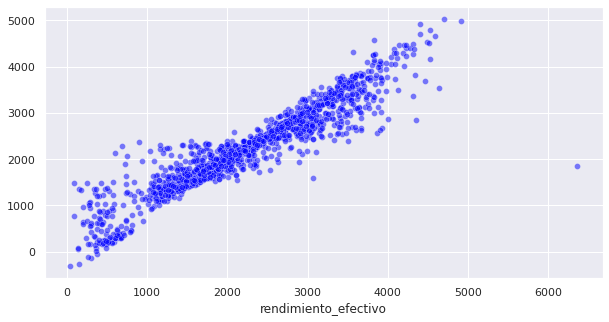

In [418]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


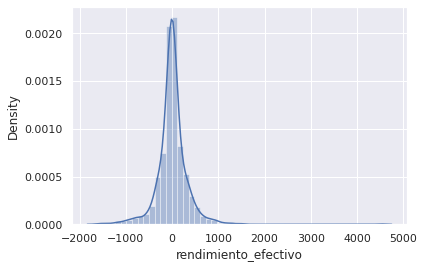

In [419]:
sns.distplot((y_test-y_pred),bins=50)

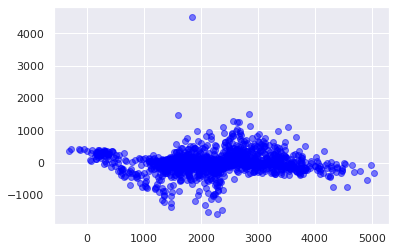

In [420]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [421]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.8750277244548533

In [422]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 110188.01995955175


In [423]:
import numpy as np

In [424]:
pd.DataFrame(y_pred).index

RangeIndex(start=0, stop=1526, step=1)

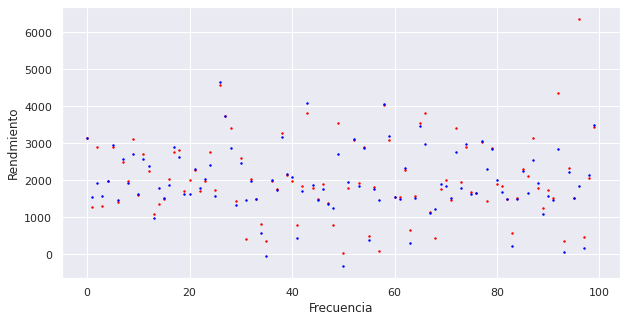

In [425]:
test_index = [i for i in range(len(y_test))]
pred_index = [i for i in range(len(y_pred))]

plt.figure(figsize=(10,5))
plt.scatter(test_index[:100],y_test[:100],color='red',s=2)
plt.scatter(pred_index[:100],y_pred[:100],color='blue',s=2)

plt.xlabel("Frecuencia")
plt.ylabel("Rendmiento")
plt.show()

#Regresión logística

In [426]:
palas['rendimiento_efectivo'].describe()

count    3813.000000
mean     2203.554944
std       925.870004
min        24.000000
25%      1597.000000
50%      2113.000000
75%      2901.000000
max      6363.000000
Name: rendimiento_efectivo, dtype: float64

Diferenciamos Bueno o Malo segun el promedio de rendimiento

In [427]:
def check(valor):
  #if valor >= 0.615921: tons / seg
  if valor >= 2204.054749: # tons / hora
    return 1
  else:
    return 0

Columna binaria

In [428]:
palas['rend_ef_bin'] = palas.apply(lambda row : check(row.rendimiento_efectivo),axis=1)

In [429]:
pd.DataFrame(palas.groupby(['rend_ef_bin']).count())

,shiftdate,shift#,eqmtid,totaltime,loadcnt,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,rendimiento_efectivo
rend_ef_bin,,,,,,,,,,,,
0,2041,2041,2041,2041,2041,2041,2041,2041,2041,2041,2041,2041
1,1772,1772,1772,1772,1772,1772,1772,1772,1772,1772,1772,1772


Dummy's

In [430]:
turno = pd.get_dummies(palas['shift#'])

In [431]:
eqmtid = pd.get_dummies(palas['eqmtid'])

In [432]:
train = pd.concat([palas.drop(['shift#','eqmtid','rendimiento_efectivo'],axis=1),turno,eqmtid],axis=1)

In [433]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3813 entries, 23 to 13629
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   shiftdate    3813 non-null   int64
 1   totaltime    3813 non-null   int64
 2   loadcnt      3813 non-null   int64
 3   tmcat02      3813 non-null   int64
 4   tmcat03      3813 non-null   int64
 5   tmcat04      3813 non-null   int64
 6   tmcat05      3813 non-null   int64
 7   tmcat06      3813 non-null   int64
 8   tmcat07      3813 non-null   int64
 9   rend_ef_bin  3813 non-null   int64
 10  1            3813 non-null   uint8
 11  2            3813 non-null   uint8
 12  026          3813 non-null   uint8
 13  029          3813 non-null   uint8
 14  030          3813 non-null   uint8
 15  210          3813 non-null   uint8
 16  211          3813 non-null   uint8
 17  212          3813 non-null   uint8
 18  213          3813 non-null   uint8
 19  305          3813 non-null   uint8
 20  306   

In [434]:
train.head(10)

,shiftdate,totaltime,loadcnt,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,rend_ef_bin,1,2,026,029,030,210,211,212,213,305,306,307,BUZON
23,737241,43200,157,0,814,3086,0,4132,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
25,737241,43200,12,0,367,3466,33774,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
27,737241,43200,55,0,3972,4192,0,4161,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
28,737241,43200,54,0,10339,0,6049,1816,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
29,737241,43200,103,0,6108,0,0,1772,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
6,737241,43200,60,0,4935,0,0,1787,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
7,737241,43200,161,0,4166,0,0,3556,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
5,737241,43200,128,0,3981,0,0,3524,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
10,737241,43200,33,0,8632,13462,0,1778,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,737241,43200,21,0,6173,15863,0,3627,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [435]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('rend_ef_bin',axis=1),
                                                    train['rend_ef_bin'],
                                                    test_size=0.30,random_state=42)

In [436]:
from sklearn.linear_model import LogisticRegression

In [437]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [438]:
y_pred = model.predict(X_test)

In [439]:
from sklearn.metrics import classification_report

In [440]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       625
           1       0.97      0.97      0.97       519

    accuracy                           0.97      1144
   macro avg       0.97      0.97      0.97      1144
weighted avg       0.97      0.97      0.97      1144



In [441]:
from sklearn.metrics import confusion_matrix

In [442]:
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix

array([[609,  16],
       [ 16, 503]])

In [443]:
import numpy as np

Accuracy: 0.972027972027972
Precision: 0.9691714836223507
Recall: 0.9691714836223507


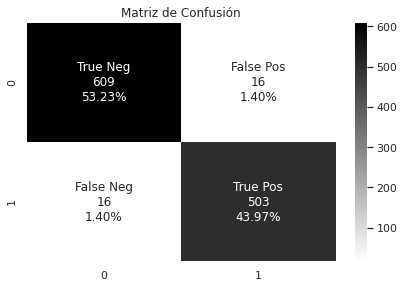

In [444]:
plot_matriz(y_test,y_pred)

In [445]:
log_reg.coef_

array([[-1.75292496e-05,  2.83393102e-04,  3.20044712e-03,
         4.87266496e-04,  1.52021718e-05, -7.81136500e-05,
         3.58672899e-05,  1.39863746e-04, -9.54617581e-06,
         1.47723320e-06, -1.47614278e-06, -4.36004286e-07,
        -3.06769170e-07, -6.25522185e-08,  8.07876404e-06,
         1.86783291e-05,  8.31596813e-06,  1.52593258e-05,
        -1.72983555e-05, -1.22820786e-05, -1.38256839e-05,
        -6.11985291e-06]])

#Árbol de decisión

In [446]:
from sklearn.tree import DecisionTreeClassifier

In [447]:
modelo = DecisionTreeClassifier()

In [448]:
modelo.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [449]:
y_pred = modelo.predict(X_test)

In [450]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus

In [451]:
tree_to_png(modelo,train,'/tree.png')

In [452]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       625
           1       0.89      0.88      0.88       519

    accuracy                           0.89      1144
   macro avg       0.89      0.89      0.89      1144
weighted avg       0.89      0.89      0.89      1144



In [453]:
confusion_matrix(y_test,y_pred)

array([[567,  58],
       [ 63, 456]])

Accuracy: 0.8942307692307693
Precision: 0.8871595330739299
Recall: 0.8786127167630058


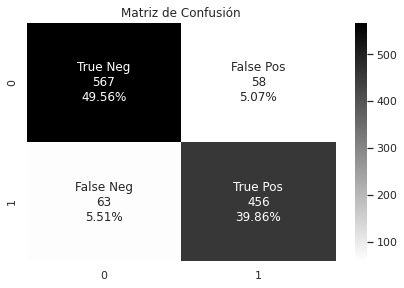

In [454]:
plot_matriz(y_test,y_pred)

Podar -> Restringir directamente el valor más bajo (número de ocurrencias de una clase particular), todos los hijos de los nodos con un conteo mínimo de clases menor que 5

In [455]:
print(sum(modelo.tree_.children_left < 0))
# start pruning from the root
podar(modelo.tree_, 0, 5)
sum(modelo.tree_.children_left < 0)

180


218

In [456]:
tree_to_png(modelo,train,'/tree_pod.png')

#Random Forest

In [457]:
from sklearn.ensemble import RandomForestClassifier

In [458]:
modelo = RandomForestClassifier(n_estimators=100)

In [459]:
modelo.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [460]:
y_pred = modelo.predict(X_test)

In [461]:
len(modelo.estimators_)

100

Imprimir 5 primeros arboles

In [462]:
for index in range(0, 5):
  name = '/tree_rf_' + str(index) + '.png'
  tree_to_png(modelo.estimators_[index],train,name)

In [463]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       625
           1       0.92      0.91      0.91       519

    accuracy                           0.92      1144
   macro avg       0.92      0.92      0.92      1144
weighted avg       0.92      0.92      0.92      1144



In [464]:
from sklearn.metrics import confusion_matrix

In [465]:
confusion_matrix(y_test,y_pred)

array([[584,  41],
       [ 49, 470]])

Accuracy: 0.9213286713286714
Precision: 0.9197651663405088
Recall: 0.905587668593449


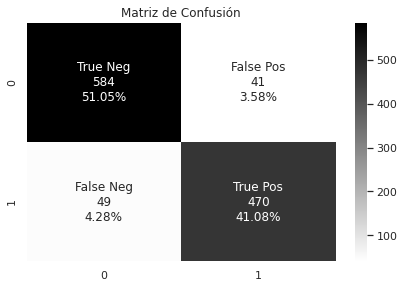

In [466]:
plot_matriz(y_test,y_pred)

#AdaBoost

In [467]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [468]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [469]:
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [470]:
clf.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

array([0])

In [471]:
clf.score(X_test, y_test)

0.9370629370629371

#KNN

In [472]:
X.columns

Index(['totaltime', 'loadcnt', 'tmcat02', 'tmcat03', 'tmcat04', 'tmcat05',
       'tmcat06', 'tmcat07'],
      dtype='object')

In [473]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [474]:
from sklearn.neighbors import KNeighborsClassifier

In [475]:
n_neighbors = 7
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.09
Accuracy of K-NN classifier on test set: 0.00


In [476]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

          24       0.00      0.00      0.00         0
          36       0.00      0.00      0.00         0
          39       0.00      0.00      0.00         1
          54       0.00      0.00      0.00         0
          83       0.00      0.00      0.00         0
          84       0.00      0.00      0.00         1
          89       0.00      0.00      0.00         0
          91       0.00      0.00      0.00         1
          94       0.00      0.00      0.00         0
         121       0.00      0.00      0.00         0
         125       0.00      0.00      0.00         0
         138       0.00      0.00      0.00         2
         145       0.00      0.00      0.00         1
         147       0.00      0.00      0.00         1
         161       0.00      0.00      0.00         0
         166   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [477]:
from matplotlib.colors import ListedColormap

In [478]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])

    
plt.title("5-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

TypeError: ignored